In [59]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import ast
import cv2
import shutil
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, Input


**1.Carga csv**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 7


In [60]:
file_path = 'C:/Users/andre/Downloads/csv_final_video7.csv'
df = pd.read_csv(file_path)

df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}"
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}"
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}"
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}"
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}"


In [61]:
# Asegurarnos de que la columna 'label' exista
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df[['filename', 'label']].head()

,filename,label
0,surco-rouviere-244.jpg,vesicula
1,surco-rouviere-244.jpg,surco
2,surco-rouviere-244.jpg,segmento4
3,surco-rouviere-326.jpg,vesicula
4,surco-rouviere-326.jpg,surco


In [62]:
# Función para convertir las coordenadas del formato JSON a (x_min, y_min, x_max, y_max)
def convert_to_bounding_box(region_shape_attributes):
    shape_dict = ast.literal_eval(region_shape_attributes)
    x_min = shape_dict['x']
    y_min = shape_dict['y']
    x_max = x_min + shape_dict['width']
    y_max = y_min + shape_dict['height']
    return x_min, y_min, x_max, y_max

In [63]:


# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df['x_min'], df['y_min'], df['x_max'], df['y_max'] = zip(*df['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df['label'] = df['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()

,filename,x_min,y_min,x_max,y_max,label
0,surco-rouviere-244.jpg,298,192,634,426,vesicula
1,surco-rouviere-244.jpg,259,367,394,475,surco
2,surco-rouviere-244.jpg,519,55,698,210,segmento4
3,surco-rouviere-326.jpg,298,64,531,470,vesicula
4,surco-rouviere-326.jpg,142,250,312,420,surco


In [64]:
array_filename= df['filename'].unique()

In [65]:
array_filename.shape

(61,)

**Carga csv 2**

Se sacan las coordenadas de las regiones de interés de las imágenes del video 2

In [66]:
file_path2 = 'C:/Users/andre/Downloads/csv_final_video2.csv'
df2 = pd.read_csv(file_path2)

df2.head()


,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,frame_15090.jpg,115668,{},3,0,"{""name"":""rect"",""x"":476,""y"":138,""width"":153,""he...","{""Region"":""vesicula""}"
1,frame_15090.jpg,115668,{},3,1,"{""name"":""rect"",""x"":338,""y"":277,""width"":132,""he...","{""Region"":""surco""}"
2,frame_15090.jpg,115668,{},3,2,"{""name"":""rect"",""x"":638,""y"":234,""width"":120,""he...","{""Region"":""segmento4""}"
3,frame_15103.jpg,128711,{},3,0,"{""name"":""rect"",""x"":454,""y"":145,""width"":143,""he...","{""Region"":""vesicula""}"
4,frame_15103.jpg,128711,{},3,1,"{""name"":""rect"",""x"":370,""y"":305,""width"":166,""he...","{""Region"":""surco""}"


In [67]:
# Asegurarnos de que la columna 'label' exista
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

df2[['filename', 'label']].head()


,filename,label
0,frame_15090.jpg,vesicula
1,frame_15090.jpg,surco
2,frame_15090.jpg,segmento4
3,frame_15103.jpg,vesicula
4,frame_15103.jpg,surco


In [68]:
# Aplicar la función a cada fila del DataFrame y extraer las coordenadas
df2['x_min'], df2['y_min'], df2['x_max'], df2['y_max'] = zip(*df2['region_shape_attributes'].map(convert_to_bounding_box))

# Asegurarnos de que la columna 'label' existe (si no se ha creado anteriormente)
df2['label'] = df2['region_attributes'].apply(lambda x: ast.literal_eval(x).get('Region', ''))

# Ahora que las columnas 'x_min', 'y_min', 'x_max', 'y_max', y 'label' están en el DataFrame,
df2[['filename', 'x_min', 'y_min', 'x_max', 'y_max', 'label']].head()


,filename,x_min,y_min,x_max,y_max,label
0,frame_15090.jpg,476,138,629,475,vesicula
1,frame_15090.jpg,338,277,470,446,surco
2,frame_15090.jpg,638,234,758,382,segmento4
3,frame_15103.jpg,454,145,597,468,vesicula
4,frame_15103.jpg,370,305,536,439,surco


In [69]:
array_filename2= df2['filename'].unique()
array_filename2.shape

(135,)

In [70]:
merged_df = pd.concat([df, df2], ignore_index=True)
merged_df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
0,surco-rouviere-244.jpg,102026,{},3,0,"{""name"":""rect"",""x"":298,""y"":192,""width"":336,""he...","{""Region"":""vesicula""}",vesicula,298,192,634,426
1,surco-rouviere-244.jpg,102026,{},3,1,"{""name"":""rect"",""x"":259,""y"":367,""width"":135,""he...","{""Region"":""surco""}",surco,259,367,394,475
2,surco-rouviere-244.jpg,102026,{},3,2,"{""name"":""rect"",""x"":519,""y"":55,""width"":179,""hei...","{""Region"":""segmento4""}",segmento4,519,55,698,210
3,surco-rouviere-326.jpg,108379,{},3,0,"{""name"":""rect"",""x"":298,""y"":64,""width"":233,""hei...","{""Region"":""vesicula""}",vesicula,298,64,531,470
4,surco-rouviere-326.jpg,108379,{},3,1,"{""name"":""rect"",""x"":142,""y"":250,""width"":170,""he...","{""Region"":""surco""}",surco,142,250,312,420


In [71]:
merged_df.tail()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,label,x_min,y_min,x_max,y_max
582,frame_24361.jpg,106592,{},3,1,"{""name"":""rect"",""x"":407,""y"":404,""width"":139,""he...","{""Region"":""surco""}",surco,407,404,546,473
583,frame_24361.jpg,106592,{},3,2,"{""name"":""rect"",""x"":461,""y"":236,""width"":281,""he...","{""Region"":""segmento4""}",segmento4,461,236,742,359
584,frame_24462.jpg,121924,{},3,0,"{""name"":""rect"",""x"":119,""y"":126,""width"":346,""he...","{""Region"":""vesicula""}",vesicula,119,126,465,388
585,frame_24462.jpg,121924,{},3,1,"{""name"":""rect"",""x"":375,""y"":402,""width"":134,""he...","{""Region"":""surco""}",surco,375,402,509,463
586,frame_24462.jpg,121924,{},3,2,"{""name"":""rect"",""x"":471,""y"":228,""width"":251,""he...","{""Region"":""segmento4""}",segmento4,471,228,722,356


**2.Carga de las imágenes**

In [72]:
images = []

In [73]:
# Directorio donde están almacenadas las imágenes
image_dir = 'C:/Users/andre/Documents/Video07/framesVideo/surco-rouviere'
image_dir2 = 'C:/Users/andre/Documents/Video02/framesVideo/extraccion'

In [74]:


# Directorio donde deseas guardar las imágenes seleccionadas
destination_directory = './durante-cirugia/'  

# Asegúrate de que el directorio de destino existe
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)

# Extraer y copiar los archivos seleccionados
for filename in array_filename:
    source_path = os.path.join(image_dir, filename)
    destination_path = os.path.join(destination_directory, filename)
    
    # Verifica si el archivo existe en el directorio original
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
    else:
        print(f"Advertencia: {filename} no se encontró en {image_dir}")

for filename in array_filename2:
    source_path = os.path.join(image_dir2, filename)
    destination_path = os.path.join(destination_directory, filename)
    
    # Verifica si el archivo existe en el directorio original
    if os.path.exists(source_path):
        shutil.copy(source_path, destination_path)
    else:
        print(f"Advertencia: {filename} no se encontró en {image_dir2}")

print("Proceso completado.")



Proceso completado.


In [75]:
def read_imageResize_with_labels(dir='..\database\dataset', target_size=(224, 224)):
    """
    Lee imágenes de un directorio, las redimensiona a 224x224 píxeles y las etiqueta según 
    la carpeta en la que se encuentran. Las imágenes son procesadas en escala de grises.

    Parámetros:
    dir (str): La ruta del directorio que contiene las carpetas 'antes-cirugia', 
               'durante-cirugia', y 'despues-cirugia'. Las carpetas deben estar en la 
               misma ubicación. Las carpetas no definidas recibirán una etiqueta de -1.

    Retorno:
    tuple: Una tupla que contiene dos elementos:
        - np.array: Un array de NumPy con las imágenes redimensionadas.
        - list: Una lista de etiquetas correspondientes a las imágenes.
    """
    labels = []
    imgs = []
    
    # Definir las carpetas y sus etiquetas correspondientes
    class_folders = {
        'antes-cirugia': 0,
        'durante-cirugia': 1,
        'despues-cirugia': 2
    }

    # Procesar cada carpeta en el directorio principal
    for folder, label in class_folders.items():
        folder_path = os.path.join(dir, folder)
        
        if not os.path.isdir(folder_path):
            print(f"Advertencia: {folder_path} no es un directorio válido.")
            continue
        
        # Procesar cada imagen en la carpeta
        for name_image in os.listdir(folder_path):
            # Obtener la ruta de la imagen
            image_path = os.path.join(folder_path, name_image)
            
            # Leer la imagen 
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            # Redimensionar la imagen
            image = cv2.resize(image, target_size, interpolation=cv2.INTER_LINEAR)
            image = image / 255.0

            # Agregar la imagen y su etiqueta a las listas
            imgs.append(image)
            labels.append(label)
    
    return np.array(imgs), labels

In [76]:
# Llamar a la función con la ruta adecuada
images, labels = read_imageResize_with_labels(dir='./')

# Verificar el tamaño de los arrays resultantes
print(f"Número de imágenes: {images.shape[0]}")
print(f"Tamaño de cada imagen: {images.shape[1:]}")

# Verificar las etiquetas
print(f"Etiquetas únicas: {set(labels)}")

Número de imágenes: 588
Tamaño de cada imagen: (224, 224, 3)
Etiquetas únicas: {0, 1, 2}


In [77]:
print(type(images[0]))

<class 'numpy.ndarray'>


In [78]:
import os

# Lista de imágenes en el directorio
images_in_directory = set(os.listdir(destination_directory))

# Lista de imágenes en el DataFrame
images_in_dataframe = set(merged_df['filename'].unique())

# Imágenes que están en el directorio pero no en el DataFrame
missing_in_dataframe = images_in_directory - images_in_dataframe

# Imágenes que están en el DataFrame pero no en el directorio
missing_in_directory = images_in_dataframe - images_in_directory

# Mostrar los resultados
print(f"Imágenes en el directorio pero no en el DataFrame: {len(missing_in_dataframe)}")
print(missing_in_dataframe)

print(f"Imágenes en el DataFrame pero no en el directorio: {len(missing_in_directory)}")
print(missing_in_directory)


Imágenes en el directorio pero no en el DataFrame: 0
set()
Imágenes en el DataFrame pero no en el directorio: 0
set()


**Procesamiento de la imágenes**

Se redimensionan a un tamaño de 224x224,se normalizan y adicionamente se obtienen las coordenadas de cada región de la imagen

In [80]:
def data_generator_coordinates(df, image_dir, input_size=(224, 224)):
    
    """
    Generador de datos para modelos de aprendizaje profundo que procesa imágenes y sus cuadros delimitadores.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con información de las imágenes y sus regiones de interés (coordenadas y etiquetas).
    image_dir : str
        Ruta del directorio donde se encuentran las imágenes.
    input_size : tuple, opcional
        Tamaño para redimensionar las imágenes (por defecto, (224, 224)).

    Yields:
    -------
    images : numpy.ndarray
        Array de imágenes redimensionadas y normalizadas.
    targets : dict
        Diccionario con cuadros delimitadores ('bounding_box') y etiquetas ('class_label').

    Descripción:
    ------------
    Redimensiona las imágenes y ajusta los cuadros delimitadores. Si una imagen tiene menos de tres regiones, 
    se añaden cuadros vacíos. Ideal para entrenar modelos con múltiples regiones por imagen.
    """


    images_now = []
    bbox_targets = []
    class_targets = []
    
    for filename in df['filename'].unique():
        image_path = os.path.join(image_dir, filename)
        image = load_img(image_path)
        original_size = image.size
        
        image = img_to_array(image) 
        
        df_image = df[df['filename'] == filename]
        bboxes = []
        labels = []
        
        for _, row in df_image.iterrows():
            label_map = {'vesicula': 0, 'surco': 1, 'segmento4': 2}
            label = label_map.get(row['label'], -1)
            x_scale = input_size[0] / original_size[0]
            y_scale = input_size[1] / original_size[1]
            
            x_min = row['x_min'] * x_scale
            y_min = row['y_min'] * y_scale
            x_max = row['x_max'] * x_scale
            y_max = row['y_max'] * y_scale
            
            bbox = [x_min, y_min, x_max, y_max]
            bboxes.append(bbox)
            labels.append(label)
        
        while len(bboxes) < 3:
            bboxes.append([0, 0, 0, 0])  # Cuadro delimitador vacío
            labels.append(-1)  # Etiqueta no válida

        images_now.append(image)
        bbox_targets.append(bboxes)
        class_targets.append(tf.keras.utils.to_categorical(labels, num_classes=3))
    
    images_now = np.array(images_now)
    bbox_targets = np.array(bbox_targets)
    class_targets = np.array(class_targets)
    
    return images_now, {"bounding_box": bbox_targets, "class_label": class_targets}

In [81]:

_, targets = data_generator_coordinates(merged_df, image_dir=destination_directory, input_size=(224, 224))

In [82]:
targets.keys()

dict_keys(['bounding_box', 'class_label'])

In [83]:
print(images.shape)

(588, 224, 224, 3)


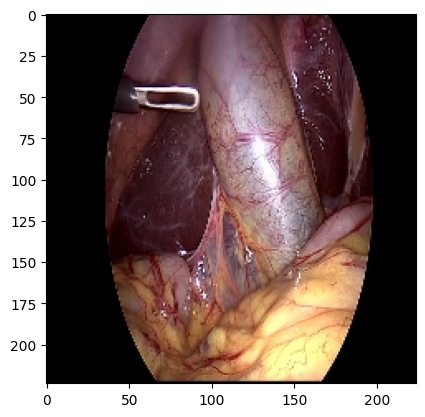

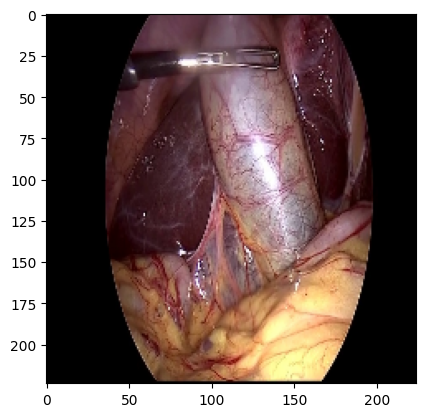

In [85]:
for i in range(2):
    plt.imshow(images[i])
    plt.show()

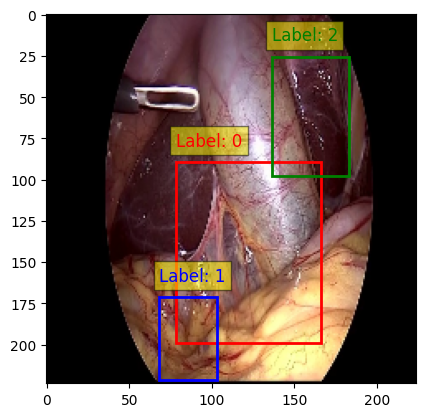

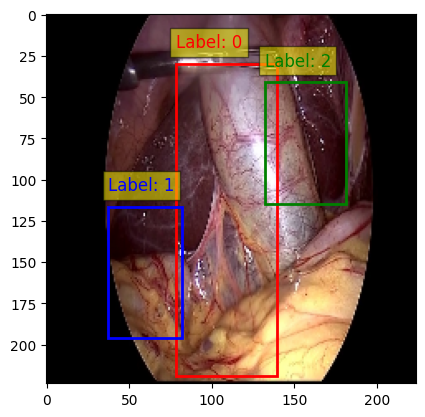

In [86]:
# Mostrar las imágenes y sus cuadros delimitadores ajustados
for i in range(2):
    plt.imshow(images[i])
    
    bbox_list = targets['bounding_box'][i]
    class_list = targets['class_label'][i]
    
    for bbox, class_label in zip(bbox_list, class_list):
        label = np.argmax(class_label)
        color = 'red' if label == 0 else ('blue' if label == 1 else 'green')
        plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], 
                                          edgecolor=color, facecolor='none', linewidth=2))
        plt.text(bbox[0], bbox[1] - 10, f"Label: {label}", color=color, fontsize=12, 
                 bbox=dict(facecolor='yellow', alpha=0.5))
    
    plt.show()

In [87]:
images.shape

(588, 224, 224, 3)

**División train-test**

**Entrenamiento de modelo de transfer learning**